In [1]:
import os
import joblib
import pickle
import pandas as pd

# import autograd.numpy as np
# import autograd.numpy.random as npr
# npr.seed(0)

%matplotlib inline
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
# import scipy.stats as stats

import sys
sys.path.append('../libraries/') # Append the path within which the user-defined class is in
from behavior_loader import bsoid_loader

In [2]:
filename = '../processed_data/m1_fr0.1hz_30hz_0s_7200s_0.1s_bins_nooverlap.sav'

with open(filename, 'rb') as file:
    spike_times_all_neurons = joblib.load(file)

# Convert to numpy array
spike_times_all_neurons = np.array(spike_times_all_neurons)

# Transpose into (71999, 90)
spike_times_all_neurons = spike_times_all_neurons.T

# Truncate two hour m1 recording to one hour l5 recording into (36000, 46), 
# 0th to 45th L5/6, 46th to 89th L2/3, 89th being the most shallow
spike_times_l5_neurons_1h = spike_times_all_neurons[:36000, :46]
data = spike_times_l5_neurons_1h

print(f'Spike times are binned into shape for hmm: {data.shape}')

Spike times are binned into shape for hmm: (36000, 46)


In [3]:
data_centered = data - np.mean(data, axis=0)
u, _, _ = np.linalg.svd(data_centered.T)

In [4]:
u_3 = u[:, :3]
data_3 = data_centered @ u_3
data_3.shape

(36000, 3)

In [5]:
data_dir = r'../processed_data'
file_name = r'ag25290_day2_iter13'
# Load behaviors
behavior_loader = bsoid_loader(data_dir, file_name)
f_index, filtered_data, smoothed_predictions = behavior_loader.main()
# Correct prediction start
framerate = 60
delay = 6.8503
behavior_start = int(delay * framerate)  # start of behavior
smoothed_predictions_1h = smoothed_predictions[behavior_start:(behavior_start+3600*60)]

mouse stayed in nest for 0.28108749470484795% of time
File #0 (a 6 body parts by 984391 frames) has 30 classes


In [6]:
labels = smoothed_predictions_1h[::6]
labels.shape

(36000,)

In [7]:
names_mod = ['insignificant', 'insignificant', 'insignificant', 'insignificant', 'rear',
         'insignificant', 'insignificant', 'investigate type 1', 'investigate type 2', 'contra-itch',
         'investigate type 3', 'insignificant', 'insignificant', 'insignificant', 'contra-body groom',
         'face groom type 1', 'dive/scrunch', 'head groom', 'ipsi-orient', 'insignificant',
         'face groom type 2', 'ipsi-body groom', 'ipsi-itch type 1', 'insignificant', 'insignificant', 
         'paw groom', 'locomotion', 'insignificant', 'contra-orient']

In [8]:
label_list = [4, 7, 8, 9, 10, 14, 15, 16, 17, 18, 20, 21, 22, 25, 26, 28]
len(label_list)

16

In [9]:
label_0 = np.where(labels==0)[0]
labeled_data_3 = data_3[label_0, :]
labeled_data_3.shape

(539, 3)

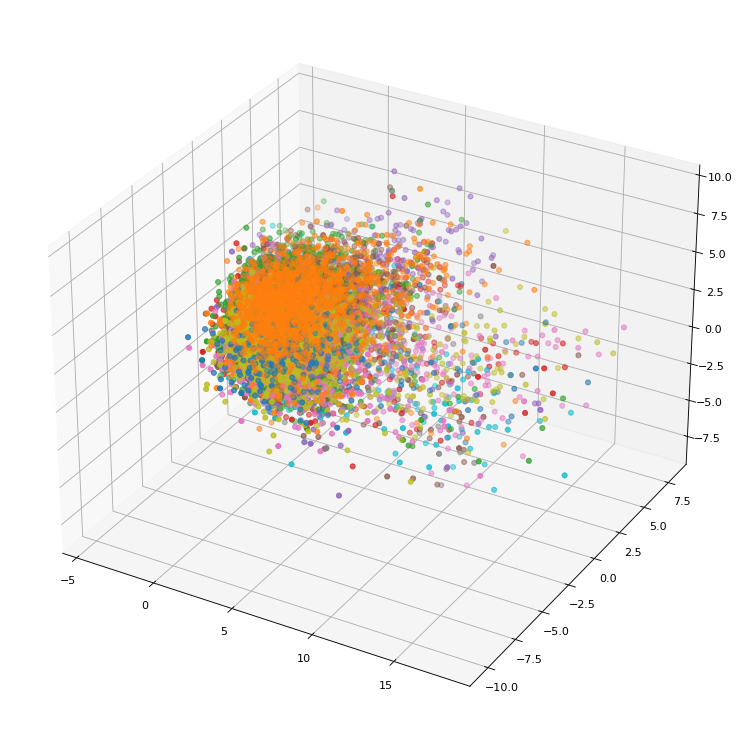

In [10]:
plt.figure(figsize=(16, 12), dpi=80)
ax = plt.axes(projection='3d')
for label in label_list:
    label_indices = np.where(labels==label)[0]
    labeled_data_3 = data_3[label_indices, :]
    ax.scatter3D(labeled_data_3[:, 0], labeled_data_3[:, 1], labeled_data_3[:, 2])
plt.show()